# Heineken Analytics Exercise 
## *__Section 1__*: Data Exploration & Data Cleaning

In [12]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# logit seom sklearn to obtain evaluation metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, recall_score, precision_score

from sklearn.model_selection import cross_val_score


#train-test split
from sklearn.model_selection import train_test_split

# logit from statsmodels
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

### Import data

In [13]:
df = pd.read_csv(R'C:\Users\edeliac\OneDrive - HM Hospitales\Escritorio\HEINEKEN\db_analyze_&_train.csv', index_col=0, decimal='.')

df.columns = df.columns.str.lower()

df.columns = df.columns.str.replace(' ', '_')

df.head()

,obs,sales,price_sensitivity,phonetype,email,tenure,numberofcampaigns,prodactive,prodbought,premium_offered,...,pension_plan,estimated_number_of_cars,probability_of_second_residence,credit,savings,number_of_mobile_phones,number_of_fixed_lines,adsl,3g_devices,type_of_house
0,1,0,NaN,FIXED / LAND PHONE,0,2012,2,0,0,11.12,...,76897.09528,two,Low,35147.05566,0.000,NaN,NaN,NaN,NaN,Urban
1,2,1,NaN,MOBILE PHONE,0,2011,2,0,1,11.12,...,18037.38088,None,Low,8133.08226,0.000,NaN,NaN,NaN,NaN,Rustic
2,3,0,NaN,FIXED / LAND PHONE,0,1992,2,0,0,14.50,...,69779.49768,two,Low,31880.39706,98010.783,3.0,2.0,1.0,0.0,Urban
3,4,0,NaN,MOBILE PHONE,0,2011,2,0,0,14.50,...,40574.30488,One,Low,18476.52126,0.000,NaN,NaN,NaN,NaN,Urban
4,5,0,NaN,MOBILE PHONE,0,1992,2,0,0,14.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check proportion of null values

In [14]:
# checking out prevalence of null values 
nulls = df.isnull().mean() * 100

# print results
nulls.to_frame('percentage_nulls').sort_values(by='percentage_nulls', ascending=False)

,percentage_nulls
price_sensitivity,92.625
number_of_semesters_paid,91.425
3g_devices,64.180
adsl,64.180
number_of_fixed_lines,64.180
number_of_mobile_phones,64.180
birthdate,52.440
type_of_house,25.775
savings,25.775
income,25.700


In [15]:
# list of columns to drop because of too many null values 
cols_to_drop = ['price_sensitivity', 'number_of_semesters_paid', 
                '3g_devices', 'adsl', 'number_of_fixed_lines', 
                'number_of_mobile_phones', 'birthdate', 'obs']

# drop columns
df.drop(columns=cols_to_drop, inplace=True)

# checking once again just in case
nulls = df.isnull().mean() * 100

# perint results
nulls.to_frame('percentage_nulls').sort_values(by='percentage_nulls', ascending=False)

,percentage_nulls
type_of_house,25.775
savings,25.775
credit,25.700
probability_of_second_residence,25.700
estimated_number_of_cars,25.700
pension_plan,25.700
house_insurance,25.700
income,25.700
house_price,25.700
living_area_(m^2),25.680


### Since Logit does not accept null values let´s go ahead and drop observations with null values

In [16]:
print(f'Total observartions: {df.shape[0]}')

Total observartions: 20000


In [17]:
df.dropna(inplace=True)

df.reset_index(inplace=True, drop=True)

print(f'Total observartions after removing nulls: {df.shape[0]}')

Total observartions after removing nulls: 14845


### Checking value ranges of numerical variables

In [18]:
df.describe()

,sales,email,tenure,numberofcampaigns,prodactive,prodbought,premium_offered,living_area_(m^2),house_price,income,yearbuilt,house_insurance,pension_plan,credit,savings
count,14845.000000,14845.000000,14845.000000,14845.000000,14845.000000,14845.000000,14845.000000,14845.000000,1.484500e+04,1.484500e+04,14845.000000,14845.000000,1.484500e+04,1.484500e+04,1.484500e+04
mean,0.087572,0.074368,2007.137218,3.656854,0.048569,0.310946,13.753175,194.657271,2.131383e+05,5.803503e+04,1979.508521,7365.778249,3.729563e+04,1.697132e+04,3.055875e+04
std,0.282680,0.262378,6.703409,4.092635,0.231276,0.694547,2.683265,552.902092,2.420394e+05,6.646773e+04,23.081277,8545.886391,4.241274e+04,1.946567e+04,7.872496e+04
min,0.000000,0.000000,1990.000000,2.000000,0.000000,0.000000,11.120000,0.000000,9.784007e+03,2.190805e+03,1900.000000,186.013800,1.661723e+03,6.173887e+02,0.000000e+00
25%,0.000000,0.000000,2004.000000,2.000000,0.000000,0.000000,11.120000,84.007840,1.237971e+05,3.350056e+04,1968.000000,4211.551800,2.164032e+04,9.784775e+03,0.000000e+00
50%,0.000000,0.000000,2010.000000,2.000000,0.000000,0.000000,14.500000,118.030440,1.702689e+05,4.626243e+04,1980.000000,5851.945800,2.978361e+04,1.352311e+04,0.000000e+00
75%,0.000000,0.000000,2012.000000,4.000000,0.000000,0.000000,14.500000,175.677240,2.410582e+05,6.570225e+04,1999.000000,8351.767800,4.218804e+04,1.921715e+04,4.728410e+04
max,1.000000,1.000000,2013.000000,32.000000,3.000000,6.000000,21.850000,33077.179640,1.495498e+07,4.106372e+06,2012.000000,527866.417800,2.620520e+06,1.202556e+06,4.884174e+06


### Excluding observations that make a customer ineligle for model training

In [19]:
# there are records that should not be included because they invalidate the customer as a possible target or as a case of a sucessfull sale
df.codecategory.value_counts()

Not Interested          10084
Ineligible               1873
Sale                     1300
No Longer a Costumer      856
Not Call                  539
Refusal                   188
Cancelled Sale              5
Name: codecategory, dtype: int64

In [20]:
# filter data so that we only keep successfull/unsucessfull cases of sales
df = df[~df['codecategory'].isin(['Ineligible', 'Not Call', 'No Longer a Costumer'])]

# check
df.codecategory.value_counts()

Not Interested    10084
Sale               1300
Refusal             188
Cancelled Sale        5
Name: codecategory, dtype: int64

In [21]:
print(f'Total observartions after removing nulls and filtering out not valid customer observations: {df.shape[0]}')

Total observartions after removing nulls and filtering out not valid customer observations: 11577


### About codecategory
* *Defintion:* Category of the phone call answer. Also indiciates if the offer was refused or accepted
* This feature must be removed as it encapsulated the same information included in the variable *__sales__*

In [25]:
# remove redundant variable 
del df['codecategory']

### Checking Distribution of classes

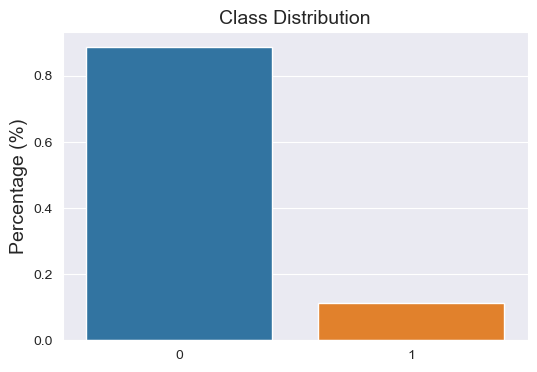

In [27]:
sns.set_style('darkgrid')

# creando df con proporción de ambas clases
classes = df['sales'].value_counts(normalize=True).to_frame()

# graficando la proporción de clases 
plt.figure(figsize=(6, 4), dpi=100)
ax = sns.barplot(x=classes.index, y='sales', data=classes)
ax.set_title('Class Distribution', fontsize=14)
ax.set_ylabel('Percentage (%)', fontsize=14)
plt.show()

### Correlations

In [32]:
# creating function to automatically identify correlated vars in any df 
def check_corr(df):
    # identificando correlaciones fuertes
    positive_correlation_threshold = 0.8  # For high positive correlation
    negative_correlation_threshold = -0.8  # For high negative correlation

    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Find feature pairs with high positive and high negative correlations
    highly_correlated_pairs = []

    # Iterate through the upper triangle of the correlation matrix to avoid duplicates
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            correlation = correlation_matrix.iloc[i, j]

            if abs(correlation) >= positive_correlation_threshold:
                highly_correlated_pairs.append((feature1, feature2, correlation))
            elif abs(correlation) <= negative_correlation_threshold:
                highly_correlated_pairs.append((feature1, feature2, correlation))

    # Display the list of highly correlated feature pairs (both positive and negative correlations)
    if not highly_correlated_pairs:
        print("No correlations were found.")
    else:
        for feature1, feature2, correlation in highly_correlated_pairs:
            print(f"({feature1}, {feature2}): {correlation}")

In [33]:
check_corr(df)

(numberofcampaigns, prodbought): 0.8072420367244542
(house_price, income): 0.9794072073191052
(house_price, house_insurance): 0.9856282374067581
(house_price, pension_plan): 0.9806656921330816
(house_price, credit): 0.9828328245478627
(house_price, savings): 0.8898070688676293
(income, house_insurance): 0.9868176514995517
(income, pension_plan): 0.9818623819525666
(income, credit): 0.9840275144526721
(income, savings): 0.891286685273428
(house_insurance, pension_plan): 0.9880832211405958
(house_insurance, credit): 0.990251063622584
(house_insurance, savings): 0.8945355846841975
(pension_plan, credit): 0.9852905420367492
(pension_plan, savings): 0.8907269728663604
(credit, savings): 0.8913993095582181


In [34]:
del df['house_price']
del df['house_insurance']
del df['pension_plan']
del df['numberofcampaigns']
del df['income']
del df['savings']
del df['product_type'] # this is a perfect predictor

In [35]:
check_corr(df)

No correlations were found.


## *__Section 2:__* Performing necessary pre-processing in clean data

In [36]:
# creating copy of the clean df 
df_clean = df.copy()

df_clean.shape

(11577, 17)

### Dummy variables

In [37]:
# obtain dummies
df_dummies = pd.get_dummies(df_clean)

# format
df_dummies.columns = df_dummies.columns.str.lower()
df_dummies.columns = df_dummies.columns.str.replace(' ', '_')

# check
df_dummies.head()

,sales,email,tenure,prodactive,prodbought,premium_offered,living_area_(m^2),yearbuilt,credit,phonetype_fixed_/_land_phone,...,right_address_right,estimated_number_of_cars_none,estimated_number_of_cars_one,estimated_number_of_cars_three,estimated_number_of_cars_two,probability_of_second_residence_high,probability_of_second_residence_low,probability_of_second_residence_medium,type_of_house_rustic,type_of_house_urban
0,0,0,2012,0,0,11.12,68.28964,2005.0,35147.05566,1,...,1,0,0,0,1,0,1,0,0,1
1,1,0,2011,0,1,11.12,85.60244,1998.0,8133.08226,0,...,1,1,0,0,0,0,1,0,1,0
2,0,0,1992,0,0,14.50,170.12964,1974.0,31880.39706,1,...,1,0,0,0,1,0,1,0,0,1
3,0,0,2011,0,0,14.50,158.64584,2007.0,18476.52126,0,...,1,0,1,0,0,0,1,0,0,1
7,0,0,1994,0,0,11.12,71.63964,1961.0,11728.37226,1,...,1,1,0,0,0,0,1,0,0,1


## *__Section 3:__* Fitting data to a LogisticRegression from *statsmodels* and analyze statistical figures about the variables

In [39]:
# spliiting into y and X
X = df_dummies.drop(columns=['sales'])
y = df_dummies['sales']

# establish model
logit_model = sm.Logit(y,X)

# fitting the model
result=logit_model.fit()

# summary table 
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.181257
         Iterations 32
                           Logit Regression Results                           
Dep. Variable:                  sales   No. Observations:                11577
Model:                          Logit   Df Residuals:                    11522
Method:                           MLE   Df Model:                           54
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                  0.4840
Time:                        16:30:08   Log-Likelihood:                -2098.4
converged:                       True   LL-Null:                       -4066.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
email                                      1.4345  

In [40]:
# informacion base del modelo
bases = pd.read_html(result.summary2().as_html())[0]
bases

,0,1,2,3
0,Model:,Logit,Pseudo R-squared:,0.4840
1,Dependent Variable:,sales,AIC:,4306.8218
2,Date:,2023-11-22 16:30,BIC:,4711.4445
3,No. Observations:,11577,Log-Likelihood:,-2098.4000
4,Df Model:,54,LL-Null:,-4066.8000
5,Df Residuals:,11522,LLR p-value:,0.0000
6,Converged:,1.0000,Scale:,1.0000
7,No. Iterations:,32.0000,NaN,NaN


In [64]:
import numpy as np

# convert logit output into a df
coef_df = pd.read_html(result.summary().tables[1].as_html(),header=0,index_col=0)[0]

# obtain absolute values of coefficients
coef_df['coef_abs_values'] = coef_df['coef'].abs()

# sort by abs value of coef
coef_df.sort_values(by='coef_abs_values', ascending=False, inplace=True)

# remove abs value column
del coef_df['coef_abs_values']

# drop null values from the output
coef_df.dropna(inplace=True)

# filter p-values
coef_df = coef_df[coef_df['P>|z|'] <= 0.05]

# reset index
coef_df.reset_index(inplace=True)

# format
coef_df.columns = coef_df.columns.str.replace('index', 'var')

# calculate odds ratio
coef_df['odds_ratio'] = np.exp(coef_df['coef'])

# arrange columns
coef_df = coef_df[['var', 'coef', 'odds_ratio', 
                   'std err', 'z', 'P>|z|',
                    '[0.025', '0.975]']]

# check df 
coef_df

,var,coef,odds_ratio,std err,z,P>|z|,[0.025,0.975]
0,prodactive,2.6221,13.764599,0.119,22.041,0.000,2.389,2.855
1,prodbought,2.3588,10.578250,0.080,29.485,0.000,2.202,2.516
2,email,1.4345,4.197546,0.102,14.090,0.000,1.235,1.634
3,premium_offered,-0.5537,0.574819,0.023,-24.019,0.000,-0.599,-0.508
4,tenure,0.0171,1.017247,0.006,2.644,0.008,0.004,0.030
5,yearbuilt,-0.0049,0.995112,0.002,-2.825,0.005,-0.008,-0.002


In [66]:
coef_df.columns

Index(['var', 'coef', 'odds_ratio', 'std err', 'z', 'P>|z|', '[0.025',
       '0.975]'],
      dtype='object')

In [74]:
# saving statiscally significant variables for later reference 

significant_vars_array = coef_df['var'].unique()

significant_vars_array

array(['prodactive', 'prodbought', 'email', 'premium_offered', 'tenure',
       'yearbuilt'], dtype=object)

In [76]:
significant_vars_df = pd.DataFrame({'Feature': significant_vars_array})

significant_vars_df

,Feature
0,prodactive
1,prodbought
2,email
3,premium_offered
4,tenure
5,yearbuilt


## *__Section 4:__* Training and Testing LogisticRegression Model from *sklearn* with all feature *(baseline model for reference)*

### Train-Test Split

In [131]:
# spliiting into y and X
X = df_dummies.drop(columns=['sales'])
y = df_dummies['sales']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

logit = LogisticRegression(random_state=123)

logit.fit(x_train, y_train)
y_hat = logit.predict(x_test)
accuracy = accuracy_score(y_test, y_hat)
roc_auc = cross_val_score(logit, x_train, y_train, cv=10, scoring='roc_auc').mean()
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)

print(f'Overall Performance\naccuracy: {accuracy}')
print(f'roc_auc: {roc_auc}\n')
print(f'Granular metrics\nprecision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')


Overall Performance
accuracy: 0.883419689119171
roc_auc: 0.9277333886856198

Granular metrics
precision: 0.3076923076923077
recall: 0.03076923076923077
f1: 0.05594405594405595


In [132]:
# set coef names
coef_names = X.columns

# Calculate coefficients
coefficients = logit.coef_[0]

# Calculate odds ratios for the positive class
odds_ratios = np.exp(coefficients)

# Create a DataFrame to display the coefficients and odds ratios
coefs_base_model = pd.DataFrame({
                                'Feature': coef_names,
                                'Coefficient': coefficients,
                                'Odds Ratio': odds_ratios
                                })

# inner join to only keep statiscally significant variables
coefs_base_model = pd.merge(significant_vars_df, coefs_base_model, how='inner', on='Feature')

# check 
coefs_base_model

,Feature,Coefficient,Odds Ratio
0,prodactive,0.241786,1.273521
1,prodbought,0.598314,1.819049
2,email,0.225304,1.252704
3,premium_offered,0.021407,1.021638
4,tenure,-0.007500,0.992528
5,yearbuilt,0.006244,1.006264


In [133]:
from sklearn.metrics import confusion_matrix


from sklearn.metrics import confusion_matrix

# define function
def plot_conf_matrix (conf_matrix, dtype):
    class_names = [0,1]
    fontsize=14
    df_conf_matrix = pd.DataFrame(
            conf_matrix, index=class_names, columns=class_names, 
        )
    fig = plt.figure()
    heatmap = sns.heatmap(df_conf_matrix, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for {0}'.format(dtype))

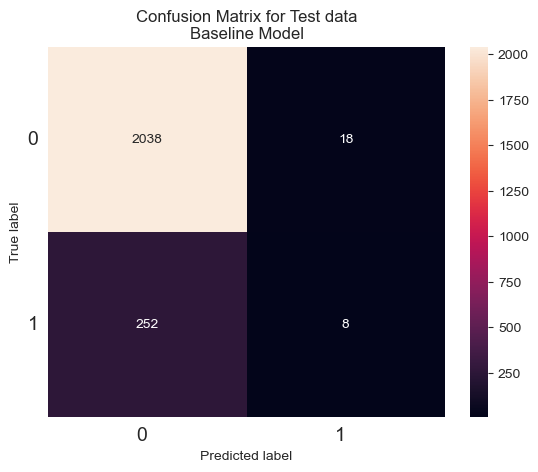

In [134]:
plot_conf_matrix(confusion_matrix(y_test, y_hat), "Test data\nBaseline Model")

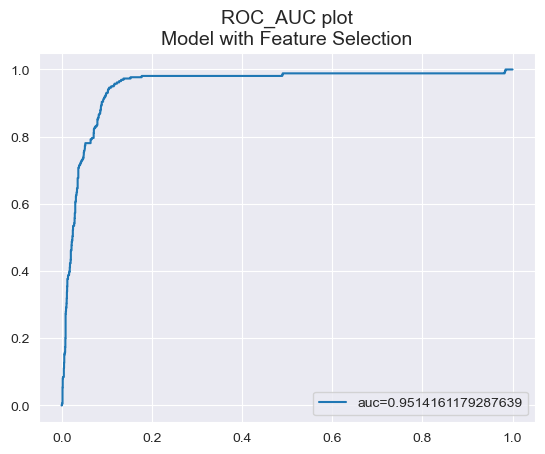

In [122]:
from sklearn import metrics

y_pred_proba = logit.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.title("ROC_AUC plot\nModel with Feature Selection", fontsize=14)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

## *__Section 5:__* Training and Testing LogisticRegression Model from *sklearn* only including statiscally significant variables

In [123]:
significant_vars_df

,Feature
0,prodactive
1,prodbought
2,email
3,premium_offered
4,tenure
5,yearbuilt


In [124]:
df_only_relevant_vars = df_dummies[['prodactive', 'prodbought', 'email', 'premium_offered', 'tenure', 'yearbuilt', 'sales']]

df_only_relevant_vars.head()

,prodactive,prodbought,email,premium_offered,tenure,yearbuilt,sales
0,0,0,0,11.12,2012,2005.0,0
1,0,1,0,11.12,2011,1998.0,1
2,0,0,0,14.50,1992,1974.0,0
3,0,0,0,14.50,2011,2007.0,0
7,0,0,0,11.12,1994,1961.0,0


#### Train-Test-Evaluate

In [135]:
# spliiting into y and X
X = df_only_relevant_vars.drop(columns=['sales'])
y = df_only_relevant_vars['sales']

# train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

# define classifier 
logit = LogisticRegression(random_state=123)

# fit - train - predict
logit.fit(x_train, y_train)
y_hat = logit.predict(x_test)
accuracy = accuracy_score(y_test, y_hat)
roc_auc = cross_val_score(logit, x_train, y_train, cv=10, scoring='roc_auc').mean()
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)

print(f'Overall Performance\naccuracy: {accuracy}')
print(f'roc_auc: {roc_auc}\n')
print(f'Granular metrics\nprecision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')

Overall Performance
accuracy: 0.9222797927461139
roc_auc: 0.9511254675892351

Granular metrics
precision: 0.7272727272727273
recall: 0.49230769230769234
f1: 0.5871559633027523


#### Analyzing coefficients of new model with only relevant features

In [136]:
# set coef names
coef_names = X.columns

# Calculate coefficients
coefficients = logit.coef_[0]

# Calculate odds ratios for the positive class
odds_ratios = np.exp(coefficients)

# Create a DataFrame to display the coefficients and odds ratios
coefs_base_model = pd.DataFrame({
                                'Feature': coef_names,
                                'Coefficient': coefficients,
                                'Odds Ratio': odds_ratios
                                })

# inner join to only keep statiscally significant variables
coefs_base_model = pd.merge(significant_vars_df, coefs_base_model, how='inner', on='Feature')

# check 
coefs_base_model

,Feature,Coefficient,Odds Ratio
0,prodactive,2.453124,11.624608
1,prodbought,2.335322,10.332782
2,email,1.493372,4.452083
3,premium_offered,-0.563467,0.569232
4,tenure,0.005612,1.005627
5,yearbuilt,-0.003965,0.996043


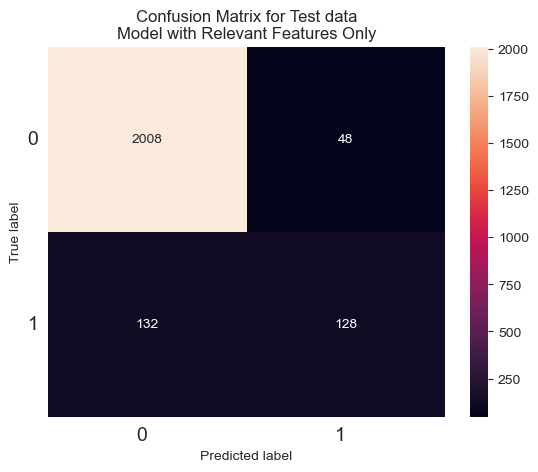

In [137]:
plot_conf_matrix(confusion_matrix(y_test, y_hat), "Test data\nModel with Relevant Features Only")

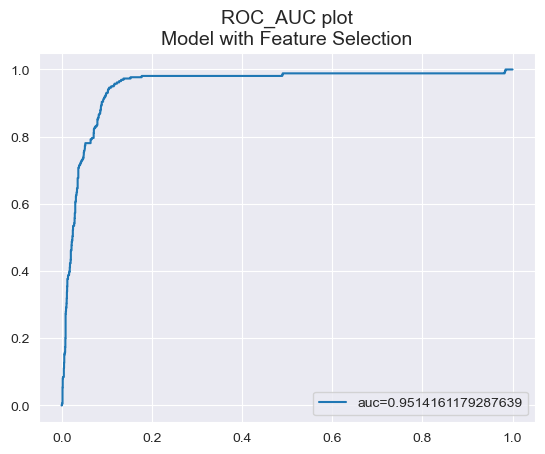

In [138]:
y_pred_proba = logit.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.title("ROC_AUC plot\nModel with Feature Selection", fontsize=14)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### *__Section 6:__* Making predictions on unseen data

#### *__Preparing Test Data (no target)__*

In [141]:
sheet_name = 'DB_10000(to validate the model)'

test_no_target = pd.read_excel(r'C:\Users\edeliac\OneDrive - HM Hospitales\Escritorio\HEINEKEN\data - Analytics challenge.xlsx', sheet_name)

# format
test_no_target.columns = test_no_target.columns.str.lower()
test_no_target.columns = test_no_target.columns.str.replace(' ', '_')

# check
test_no_target.head()

,obs,price_sensitivity,phonetype,email,tenure,numberofcampaigns,prodactive,prodbought,birthdate,socieconomic_status,...,pension_plan,estimated_number_of_cars,probability_of_second_residence,credit,savings,number_of_mobile_phones,number_of_fixed_lines,adsl,3g_devices,type_of_house
0,1,6.0,FIXED / LAND PHONE,0,2011,4,0,0,1962.0,High,...,40289.464296,One,Low,18386.272962,56033.07732,2.0,1.0,1.0,0.0,Urban
1,2,NaN,FIXED / LAND PHONE,0,2012,2,0,0,NaN,Medium,...,13824.893096,None,Low,6240.219762,0.00000,NaN,NaN,NaN,NaN,Urban
2,3,NaN,FIXED / LAND PHONE,0,2011,6,0,1,NaN,Low,...,74436.255496,two,Low,34058.121162,66860.13132,0.0,0.0,0.0,0.0,Urban
3,4,NaN,FIXED / LAND PHONE,0,2012,2,0,0,1976.0,Low,...,66466.846696,two,Low,30400.519362,428621.27832,0.0,1.0,0.0,0.0,Urban
4,5,NaN,MOBILE PHONE,0,2013,2,0,0,1949.0,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
test_no_target.shape

(10000, 27)

In [143]:
# select features previuosly included in the train data
test_no_target = test_no_target[['obs', 'prodactive', 'prodbought', 'email', 'tenure', 'yearbuilt']]

# check
test_no_target.head()

,obs,prodactive,prodbought,email,tenure,yearbuilt
0,1,0,0,0,2011,1961.0
1,2,0,0,0,2012,1955.0
2,3,0,1,0,2011,2001.0
3,4,0,0,0,2012,1980.0
4,5,0,0,0,2013,NaN


In [144]:
# checking out prevalence of null values 
nulls = test_no_target.isnull().mean() * 100

# print results
nulls.to_frame('percentage_nulls').sort_values(by='percentage_nulls', ascending=False)

,percentage_nulls
yearbuilt,21.69
obs,0.00
prodactive,0.00
prodbought,0.00
email,0.00
tenure,0.00


In [145]:
# fill null values in the specified column with the mean 
test_no_target['yearbuilt'] = test_no_target['yearbuilt'].fillna(test_no_target['yearbuilt'].mean())

# checking out prevalence of null values once again
nulls = test_no_target.isnull().mean() * 100

# print results
nulls.to_frame('percentage_nulls').sort_values(by='percentage_nulls', ascending=False)

,percentage_nulls
obs,0.0
prodactive,0.0
prodbought,0.0
email,0.0
tenure,0.0
yearbuilt,0.0


#### *__Preparing Training Data__*

In [146]:
df_only_relevant_vars = df_only_relevant_vars[['prodactive', 'prodbought', 'email', 'tenure', 'yearbuilt', 'sales']]

#### *__Defining training sets and fitting model to my data__*

In [147]:
# spliiting into y and x (grabbing the training data on its entirety)
x_train = df_only_relevant_vars.drop(columns=['sales'])
y_train = df_only_relevant_vars['sales']

# define model
logit = LogisticRegression(random_state=123)

# fit model to training data with the correct features
logit.fit(x_train, y_train)

LogisticRegression(random_state=123)

In [148]:
# x_train and test set must have the same column order 
print(x_train.columns)
print(test_no_target.columns)

Index(['prodactive', 'prodbought', 'email', 'tenure', 'yearbuilt'], dtype='object')
Index(['obs', 'prodactive', 'prodbought', 'email', 'tenure', 'yearbuilt'], dtype='object')


#### *__Making Predictions on Unseen Data__*

In [149]:
# sort based on observations so I can append predictions correctly in further steps
test_no_target.sort_values(by='obs', ascending=True, inplace=True)

# saving record id for appending predictions later
test_id = test_no_target['obs']

#prediction on test data
test_no_target = test_no_target.drop(columns=['obs']) # drop

# predictions on unseen data
y_predicted = logit.predict(test_no_target)

In [150]:
#concatenating
predictions = pd.concat([test_id, pd.DataFrame(y_predicted)], axis=1)

predictions['predictions'] = y_predicted

predictions = predictions[['obs', 'predictions']]

In [151]:
# check
predictions.head()

,obs,predictions
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


#### *__Export Predictions__*

In [152]:
# export predictions 
predictions.to_csv('predicciones_emiliano_delia_20231122.csv')